In [131]:
from scipy.signal import medfilt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [132]:
def optimized_hampel(vals, k=5, t0=3):
    L = medfilt(vals, kernel_size=(2*k+1))
    S0 = medfilt(np.abs(vals - L), kernel_size=(2*k+1))
    S0 = S0 * 1.4826  # Escalar para aproximar o desvio padrão se os dados são Gaussianos
    outliers = np.abs(vals - L) > (t0 * S0)
    filtered_vals = vals.copy()
    filtered_vals[outliers] = L[outliers]
    return filtered_vals

In [133]:
window_size = 2

# Carregar os dados
dados = pd.read_csv('base/amostra_temperatura.csv')
dados['hr_medicao'] = pd.to_datetime(dados['hr_medicao'])

# Exibir as primeiras linhas para entender a estrutura
dados.head()

,hr_medicao,cdg_stacao,temperatura
0,2023-01-01 00:00:00,A002,21.1
1,2023-01-01 01:00:00,A002,21.1
2,2023-01-01 02:00:00,A002,20.7
3,2023-01-01 03:00:00,A002,20.7
4,2023-01-01 04:00:00,A002,20.5


In [134]:
# dados = dados.iloc[:168]

In [135]:
# Aplicar o filtro de Hampel otimizado
dados['temperatura_filtrada'] = optimized_hampel(dados['temperatura'], k=window_size)

In [136]:
dados_amostra = dados.iloc[:48]

In [137]:
dados_amostra

,hr_medicao,cdg_stacao,temperatura,temperatura_filtrada
0,2023-01-01 00:00:00,A002,21.1,20.7
1,2023-01-01 01:00:00,A002,21.1,20.7
2,2023-01-01 02:00:00,A002,20.7,20.7
3,2023-01-01 03:00:00,A002,20.7,20.7
4,2023-01-01 04:00:00,A002,20.5,20.5
5,2023-01-01 05:00:00,A002,19.9,20.0
6,2023-01-01 06:00:00,A002,20.0,20.0
7,2023-01-01 07:00:00,A002,19.6,19.6
8,2023-01-01 08:00:00,A002,19.5,19.5
9,2023-01-01 09:00:00,A002,19.5,19.6


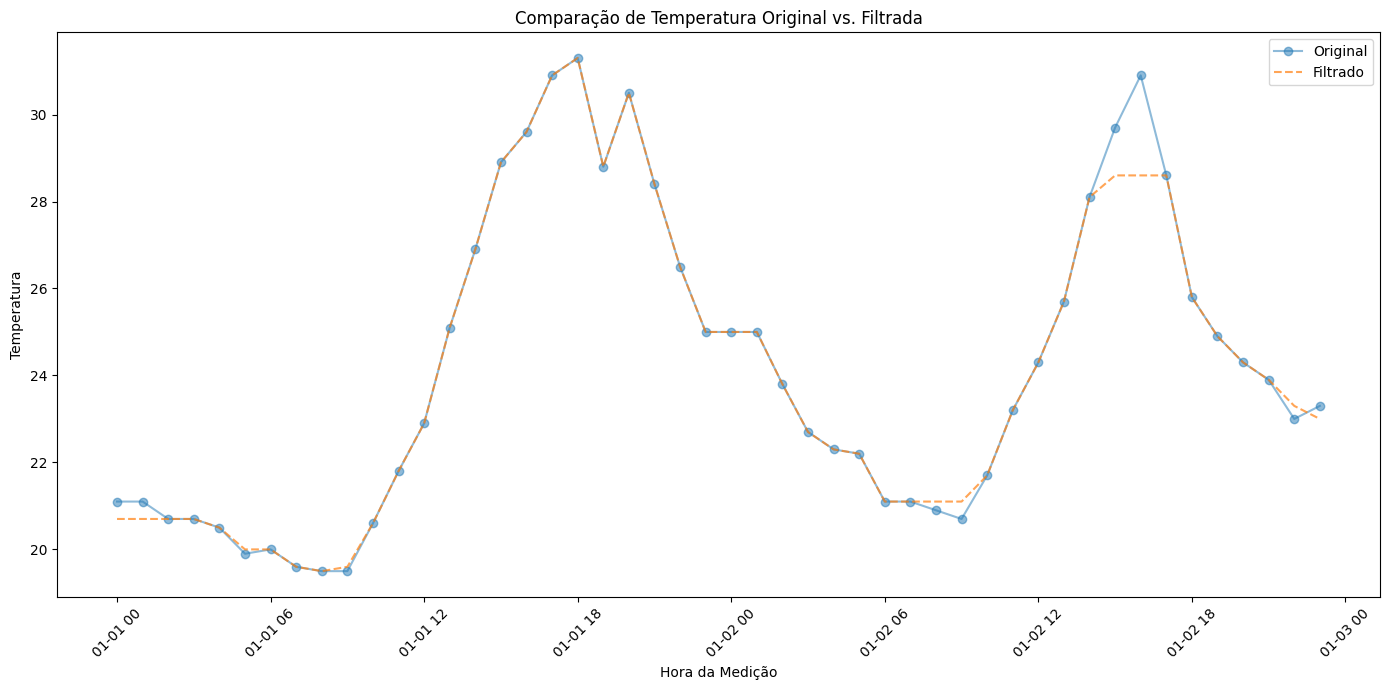

In [138]:


# Plotar novamente, esperando menor tempo de execução
plt.figure(figsize=(14, 7))
plt.plot(dados_amostra['hr_medicao'], dados_amostra['temperatura'], label='Original', alpha=0.5, marker='o')
plt.plot(dados_amostra['hr_medicao'], dados_amostra['temperatura_filtrada'], label='Filtrado', alpha=0.7, linestyle='--')
plt.xticks(rotation=45)
plt.xlabel('Hora da Medição')
plt.ylabel('Temperatura')
plt.title('Comparação de Temperatura Original vs. Filtrada')
plt.legend()
plt.tight_layout()

# Mostrar o gráfico
plt.show()


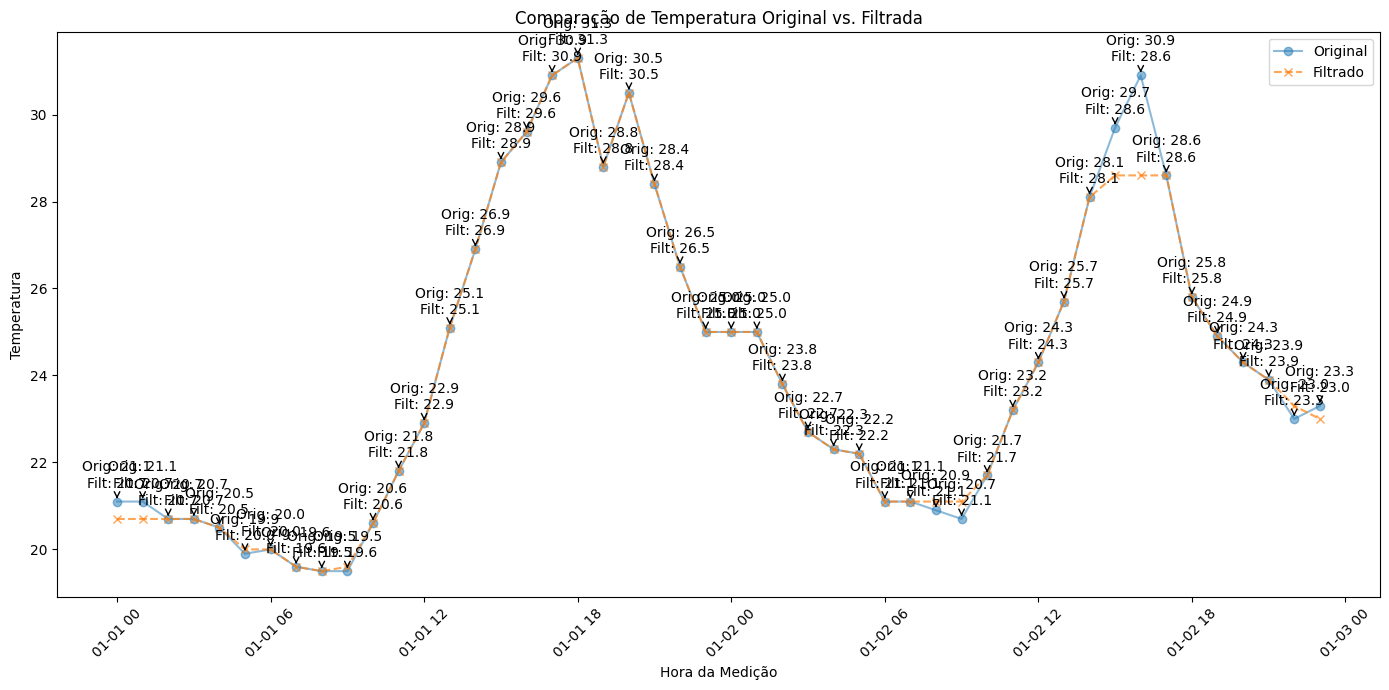

In [139]:
# Plotar o gráfico
plt.figure(figsize=(14, 7))
plt.plot(dados_amostra['hr_medicao'], dados_amostra['temperatura'], label='Original', alpha=0.5, marker='o')
plt.plot(dados_amostra['hr_medicao'], dados_amostra['temperatura_filtrada'], label='Filtrado', alpha=0.7, linestyle='--', marker='x')

# Anotar alguns pontos selecionados
for i, row in dados_amostra.iterrows():
    plt.annotate(f"Orig: {row['temperatura']}\nFilt: {row['temperatura_filtrada']}", 
                 (row['hr_medicao'], row['temperatura']),
                 textcoords="offset points", # Como posicionar o texto
                 xytext=(0,10), # Distância do texto ao ponto (x,y)
                 ha='center', # Alinhamento horizontal
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

plt.xticks(rotation=45)
plt.xlabel('Hora da Medição')
plt.ylabel('Temperatura')
plt.title('Comparação de Temperatura Original vs. Filtrada')
plt.legend()
plt.tight_layout()
plt.show()

In [140]:
import pandas as pd
import plotly.graph_objects as go

# Supondo que 'dados_amostra' é o seu DataFrame e já contém as colunas 'temperatura', 'temperatura_filtrada', e 'hr_medicao'
# Criar figura
fig = go.Figure()

# Adicionar linha original
fig.add_trace(go.Scatter(x=dados_amostra['hr_medicao'], y=dados_amostra['temperatura'],
                         mode='lines+markers',
                         name='Original',
                         hoverinfo='text',
                         text=['Orig: {:.1f}, Data/Hora: {}'.format(t, d) for t, d in zip(dados_amostra['temperatura'], dados_amostra['hr_medicao'])]))

# Adicionar linha filtrada
fig.add_trace(go.Scatter(x=dados_amostra['hr_medicao'], y=dados_amostra['temperatura_filtrada'],
                         mode='lines+markers',
                         name='Filtrado',
                         hoverinfo='text',
                         text=['Filt: {:.1f}, Data/Hora: {}'.format(t, d) for t, d in zip(dados_amostra['temperatura_filtrada'], dados_amostra['hr_medicao'])]))

# Atualizar layout
fig.update_layout(title='Comparação de Temperatura Original vs. Filtrada',
                  xaxis_title='Hora da Medição',
                  yaxis_title='Temperatura',
                  hovermode='closest')  # Atualize para 'x' ou 'y' para mudar o comportamento de hover

# Mostrar figura
fig.show()
